# Diwali Sales Analysis

### Importing the libraries and setting up few values

In [1]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as stats
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

### Reading the csv file

In [3]:
# Specify the encoding parameter when reading the CSV file
df = pd.read_csv("Diwali Sales Data.csv", encoding='latin-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

### Checking the Data types

In [5]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

### Showing the Stastical Information

In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
df.describe(include = 'all')

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251,11251,11251,11251,11251.000000,11251.000000,11251,11251,11251,11251,11251.000000,11239.000000,0.0,0.0
unique,NaN,1250,2351,2,7,NaN,NaN,16,5,15,18,NaN,NaN,NaN,NaN
top,NaN,Vishakha,P00265242,F,26-35,NaN,NaN,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN,NaN,NaN
freq,NaN,42,53,7842,4543,NaN,NaN,1946,4296,1588,2655,NaN,NaN,NaN,NaN
mean,1.003004e+06,NaN,NaN,NaN,NaN,35.421207,0.420318,NaN,NaN,NaN,NaN,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,NaN,NaN,NaN,NaN,12.754122,0.493632,NaN,NaN,NaN,NaN,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,NaN,NaN,NaN,NaN,27.000000,0.000000,NaN,NaN,NaN,NaN,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,NaN,NaN,NaN,NaN,33.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,NaN,NaN,NaN,NaN,43.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,12675.000000,NaN,NaN


### Getting the summary of the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Data Wrangling

### Checking for Null Values

In [9]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
df.shape

(11251, 15)

In [11]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)
df.dropna(inplace = True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [12]:
df.shape

(11239, 13)

In [13]:
df['Amount'] = df['Amount'].astype(np.int64)

In [14]:
df['Amount'].dtypes

dtype('int64')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Exploratory Data Analysis

#### Checking the unique values of each column

In [16]:
columns_to_check = ['Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders']
for i in columns_to_check:
    unique_values = df[i].value_counts()
    print(f"Unique values for column '{i}' :\n{unique_values}\n")

Unique values for column 'Gender' :
Gender
F    7832
M    3407
Name: count, dtype: int64

Unique values for column 'Age Group' :
Age Group
26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: count, dtype: int64

Unique values for column 'Age' :
Age
30    522
26    494
28    460
29    454
31    448
32    444
35    442
34    439
27    432
33    428
20    252
45    247
22    247
21    245
44    245
19    242
38    236
23    233
39    231
41    229
25    229
43    227
24    221
40    220
36    218
50    217
37    214
47    210
18    210
42    194
46    188
48    186
49    182
54    176
52    171
53    168
51    159
55    156
16     61
15     53
13     53
12     51
17     46
14     32
64     21
76     20
87     17
69     16
89     15
63     15
75     15
61     15
85     14
66     13
58     13
83     12
84     12
65     12
68     12
56     12
86     12
88     11
79     11
90     11
67     11
71     11
73     10
60     10
57     10
74     10

### Box Plot Analysis on Categorical Values

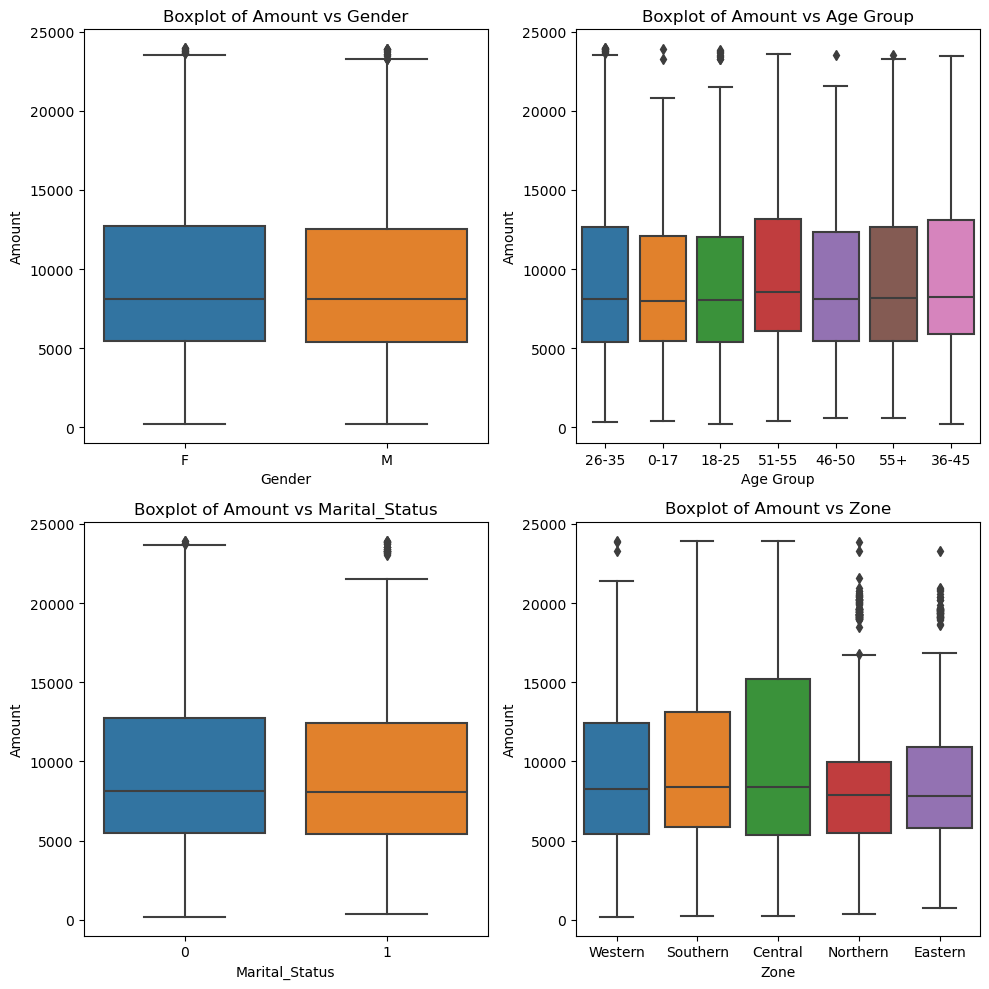

In [17]:
categorical_values = ['Gender', 'Age Group', 'Marital_Status', 'Zone']

# Create a figure with Subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate over categorical variables and create boxplots
for i, var in enumerate(categorical_values):
    if i < len(axes):  # Check if index is within bounds
        sns.boxplot(x=var, y='Amount', data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of Amount vs {var}')

plt.tight_layout()
plt.show()

The **box plot analysis** allows us to visualize the dispersion of categorical values effectively. By examining the plot, we can observe that the **median values** fall within the range of **5000-10000** for all categories. Additionally, we gain insights into the data spread and identify the **outliers** in the data. The **interquartile range (IQR)** for these categories lies between **5000-15000**.

## Bar Charts

### Gender

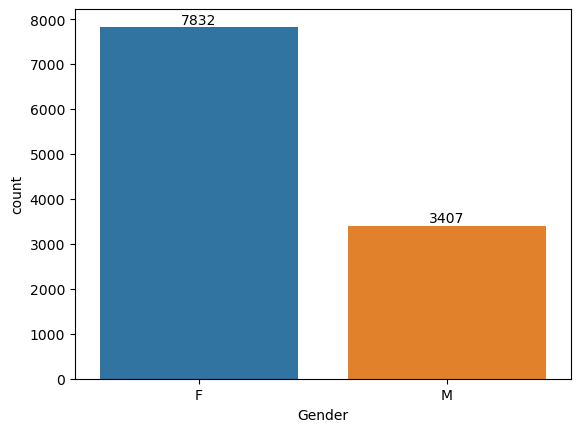

In [18]:
# Plotting the bar chart for Gender and its count
ax = sns.countplot(x= 'Gender', data = df)

for i in ax.containers:
    ax.bar_label(i)

  Gender    Amount
0      F  74335853
1      M  31913276


<Axes: xlabel='Gender', ylabel='Amount'>

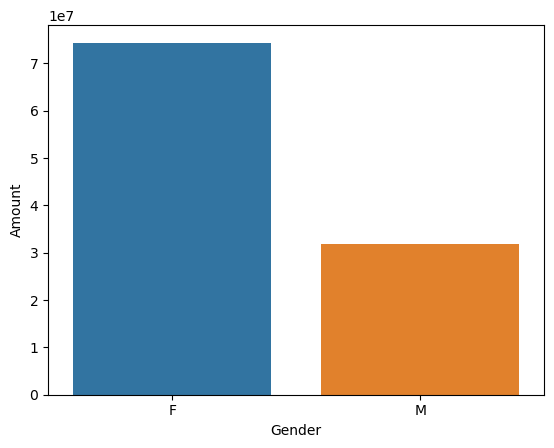

In [19]:
# Plotting the bar chart for Gender vs total amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)
print(sales_gen)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)


Based on the bar charts, we observe that there are **more female buyers** than male buyers. Additionally, the **purchasing power of female buyers** surpasses that of male buyers. 👥💰

### Age

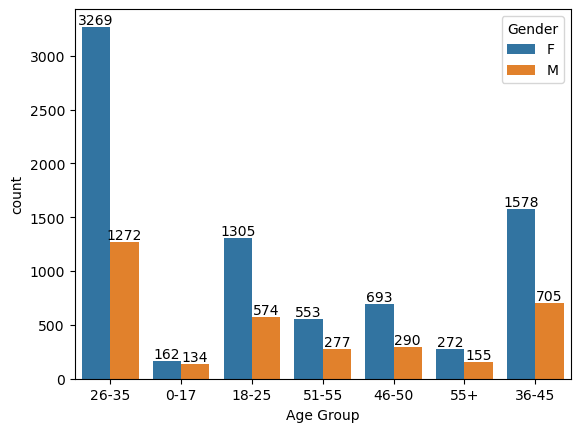

In [20]:
# Plotting the bar chart for Age Group and its count
ax = sns.countplot(x= 'Age Group', data = df, hue = 'Gender')

for i in ax.containers:
    ax.bar_label(i)

  Age Group    Amount
2     26-35  42613442
3     36-45  22144994
1     18-25  17240732
4     46-50   9207844
5     51-55   8261477
6       55+   4080987
0      0-17   2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

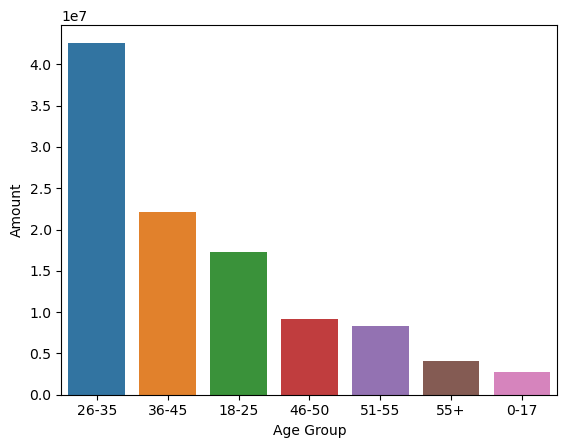

In [21]:
# Plotting the bar chart for Age Group vs total amount
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)
print(sales_age)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

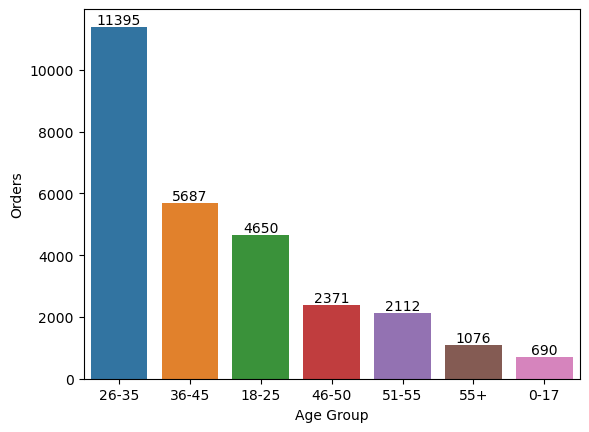

In [22]:
# Plotting the bar chart for Age Group vs Orders
sales_age_orders = df.groupby(['Age Group'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False)
# print(sales_age_orders)
ax = sns.barplot(x = 'Age Group', y = 'Orders', data = sales_age_orders)
for i in ax.containers:
    ax.bar_label(i)

Based on the bar graphs, we can see that during the festive season of Diwali, the **26-35 age group** has made higher spending. Additionally, there are more buyers in this age group, with **female buyers outnumbering male buyers**, and they also place **higher order volumes**. 🛒🎉

### State

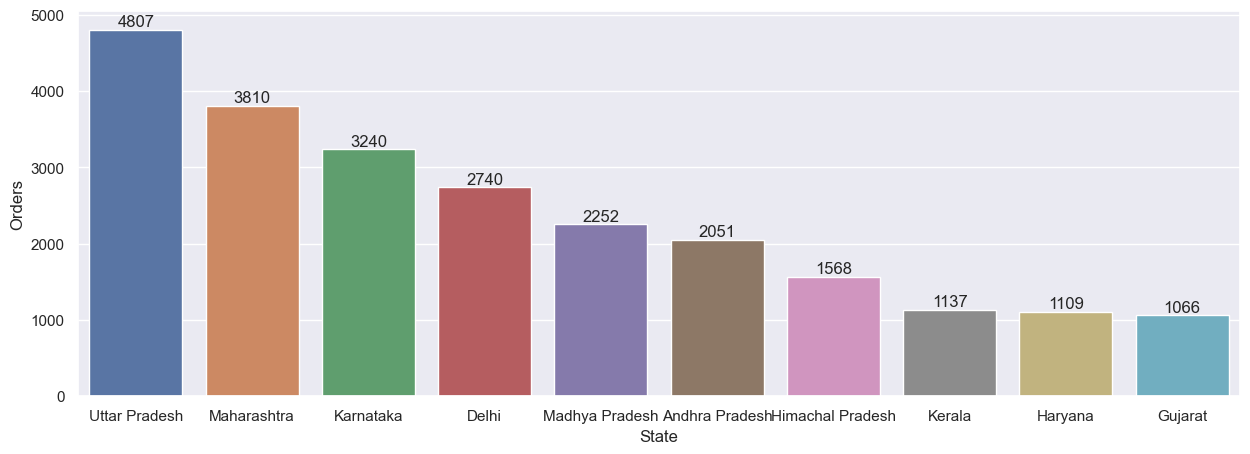

In [23]:
# Total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)
# print(sales_state)
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x = 'State', y = 'Orders', data = sales_state)
for i in ax.containers:
    ax.bar_label(i)

               State    Amount
14     Uttar Pradesh  19374968
10       Maharashtra  14427543
7          Karnataka  13523540
2              Delhi  11603818
9     Madhya Pradesh   8101142
0     Andhra Pradesh   8037146
5   Himachal Pradesh   4963368
4            Haryana   4220175
1              Bihar   4022757
3            Gujarat   3946082


<Axes: xlabel='State', ylabel='Amount'>

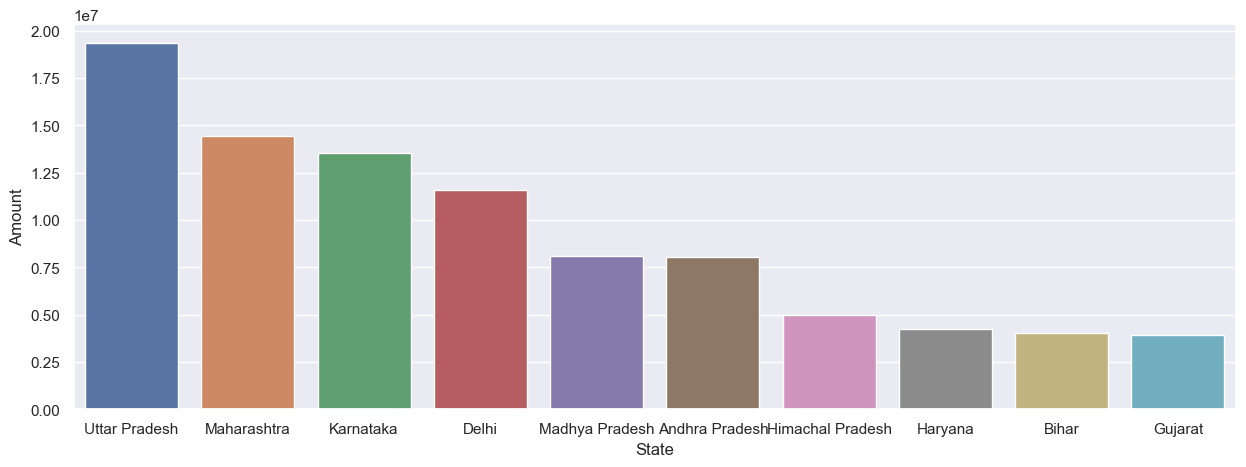

In [24]:
# Total Amount from top 10 states
sales_state_amt = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
print(sales_state_amt)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_state_amt)

Based on the bar graphs, the **highest number of orders** comes from the states of **Uttar Pradesh, Maharashtra, and Karnataka**. Additionally, the **total revenue** generated follows the same order: Uttar Pradesh, Maharashtra, and Karnataka. 📊💰

### Zonal Analysis

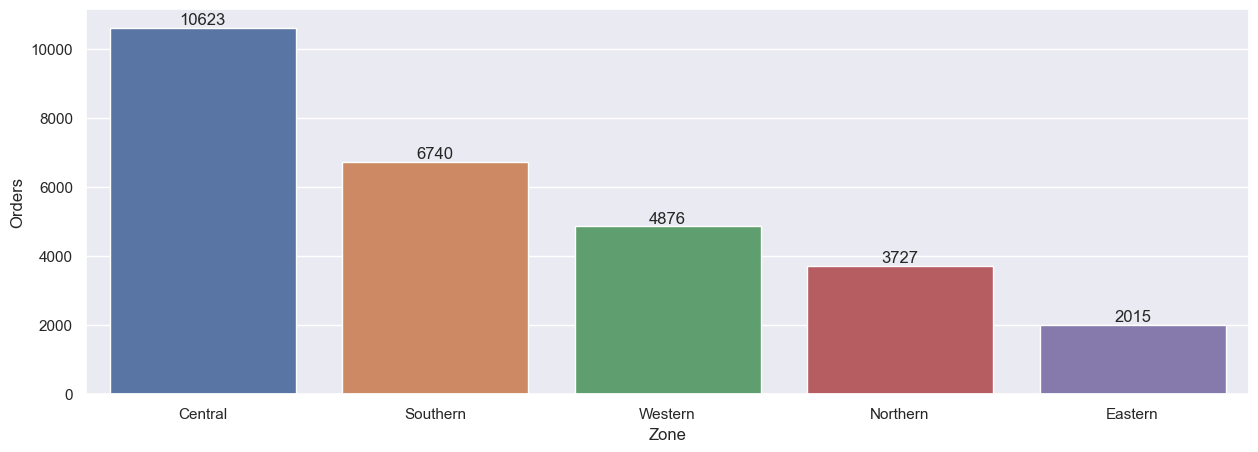

In [25]:
# Total number of orders from different zones
sales_zone = df.groupby(['Zone'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False)
# print(sales_state)
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x = 'Zone', y = 'Orders', data = sales_zone)
for i in ax.containers:
    ax.bar_label(i)

       Zone    Amount
0   Central  41600872
3  Southern  26606667
4   Western  18373625
2  Northern  12618752
1   Eastern   7049213


<Axes: xlabel='Zone', ylabel='Amount'>

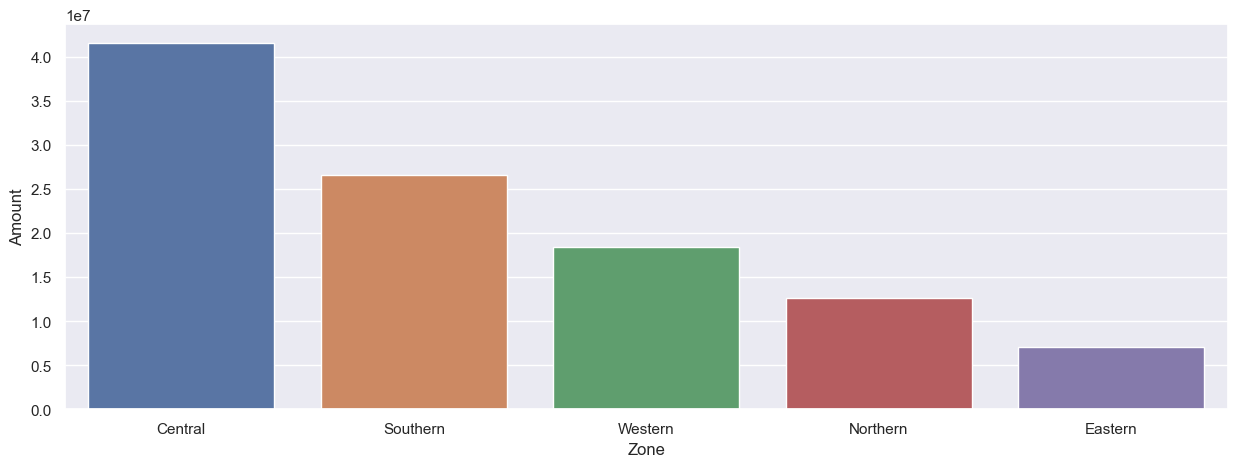

In [26]:
# Total Amount from different zones
sales_zone_amt = df.groupby(['Zone'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)
print(sales_zone_amt)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Zone', y = 'Amount', data = sales_zone_amt)

The contribution in revenue generation is highest from the central, southern and western zone.

### Marital Status

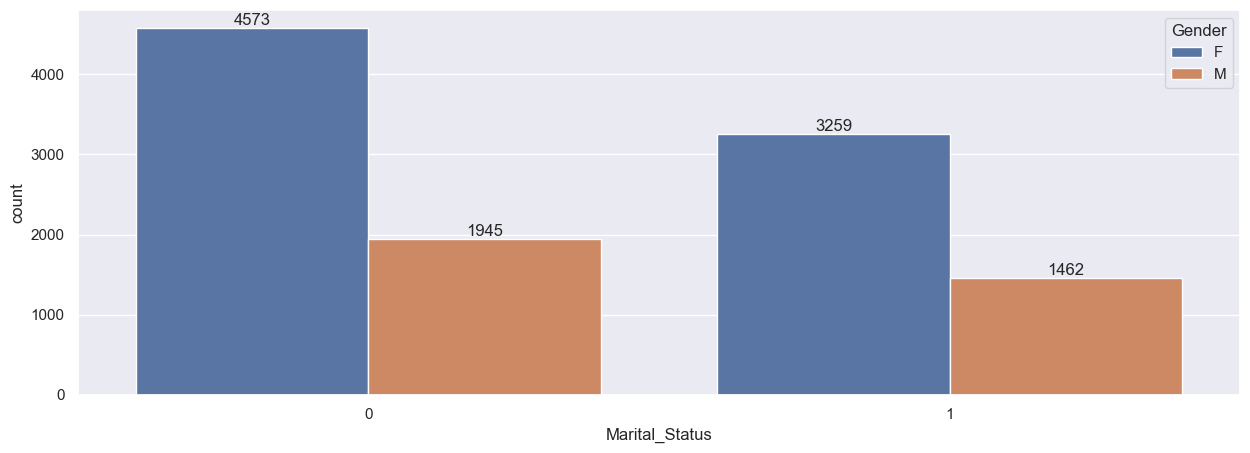

In [27]:
# Plotting the bar chart for Marital Status and its count
ax = sns.countplot(x= 'Marital_Status', data = df, hue = 'Gender')
sns.set(rc={'figure.figsize':(7,5)})
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

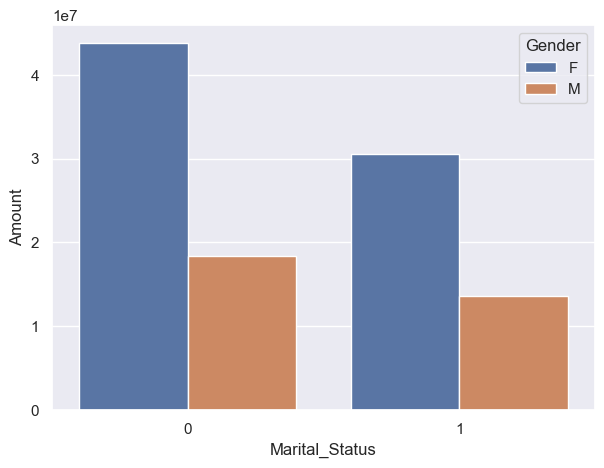

In [28]:
sales_marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_marital_status, hue = 'Gender')

The bar graphs indicate that the **highest number of orders and sales** are attributed to **married individuals, particularly females**. 📊👫💰

### Occupation

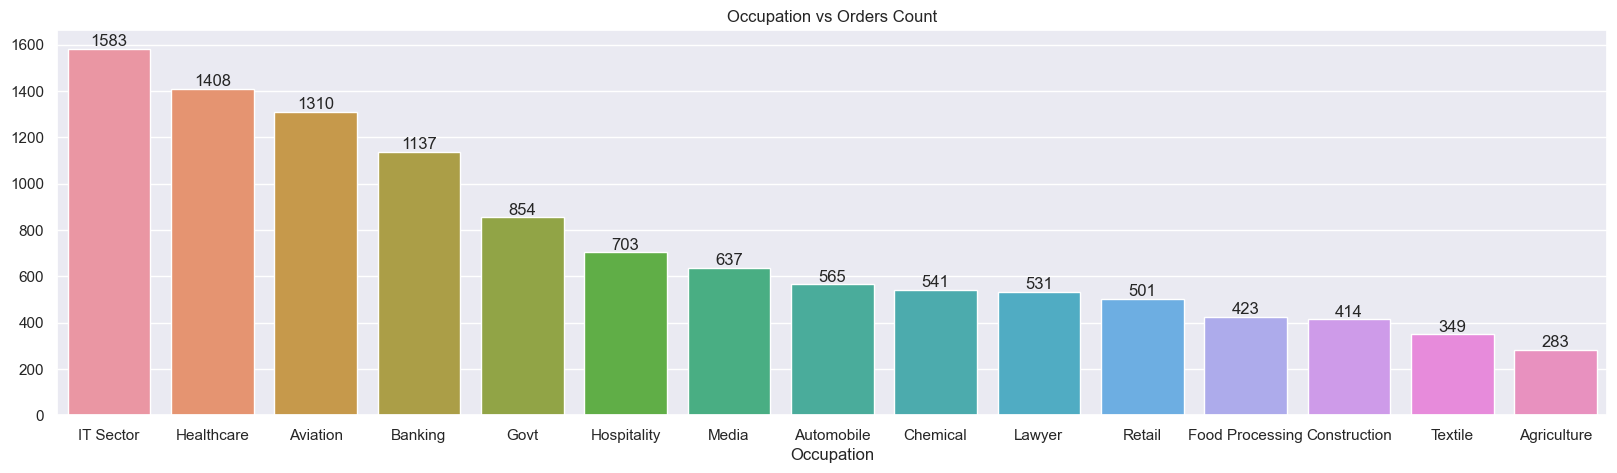

In [34]:
# Plotting the bar chart for Occupation and order count
occupation_counts = df['Occupation'].value_counts()

# Sort the counts in ascending order
sorted_counts = occupation_counts.sort_values(ascending=False)

# Create a bar plot
ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values)
sns.set(rc={'figure.figsize':(20,5)})
# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i)
plt.title('Occupation vs Orders Count')
plt.show()

     Occupation    Amount
10    IT Sector  14755079
8    Healthcare  13034586
2      Aviation  12602298
3       Banking  10770610
7          Govt   8517212
9   Hospitality   6376405
12        Media   6295832
1    Automobile   5368596
4      Chemical   5297436
11       Lawyer   4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

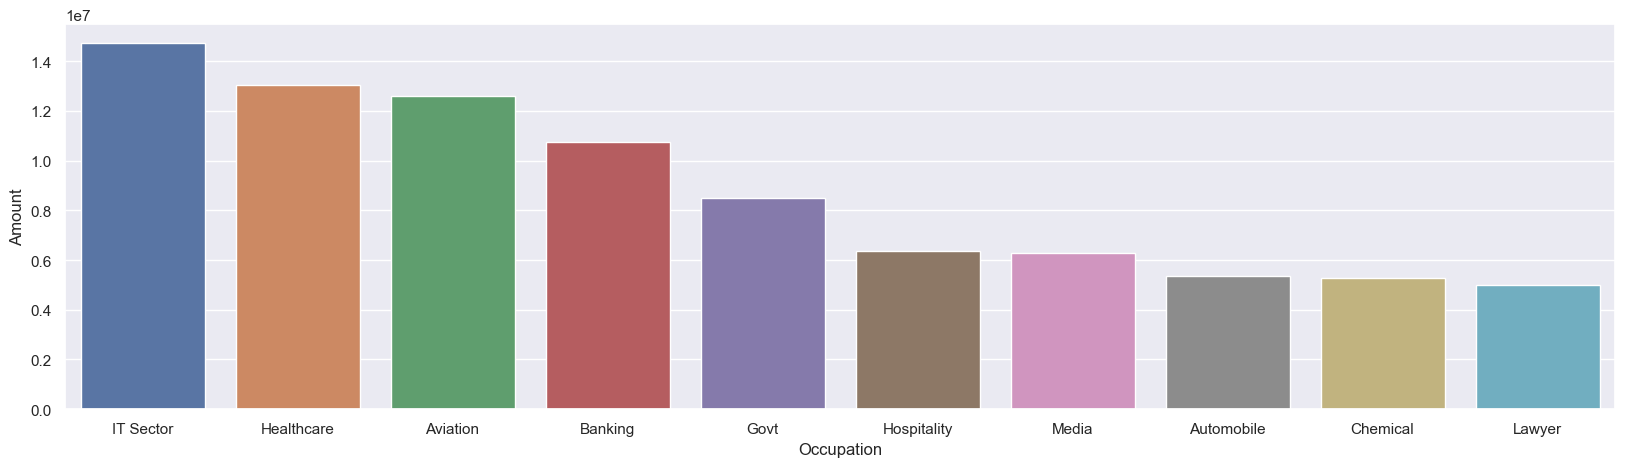

In [30]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
print(sales_occupation)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occupation)

The graph clearly indicates that the IT, Healthcare, and Aviation sectors are the primary contributors to Revenue generation.

### Product Category

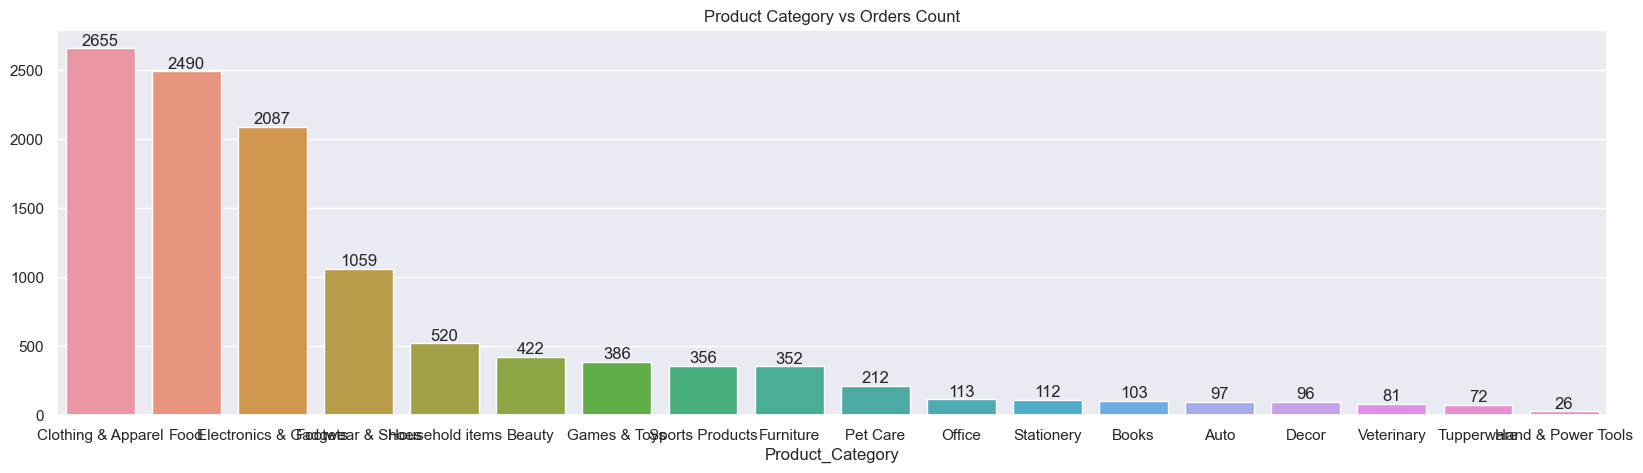

Product_Category
Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64


In [31]:
# Plotting the bar chart for Product Category and order count
product_category_counts = df['Product_Category'].value_counts()

# Sort the counts in ascending order
sorted_counts_pc = product_category_counts.sort_values(ascending=False)

# Create a bar plot
ax = sns.barplot(x=sorted_counts_pc.index, y=sorted_counts_pc.values)
sns.set(rc={'figure.figsize':(20,5)})
# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i)
plt.title('Product Category vs Orders Count')
plt.show()
print(sorted_counts_pc)

         Product_Category    Amount
6                    Food  33933883
3      Clothing & Apparel  16495019
5   Electronics & Gadgets  15643846
7        Footwear & Shoes  15575209
8               Furniture   5440051
9            Games & Toys   4331694
14        Sports Products   3635933
1                  Beauty   1959484
0                    Auto   1958609
15             Stationery   1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

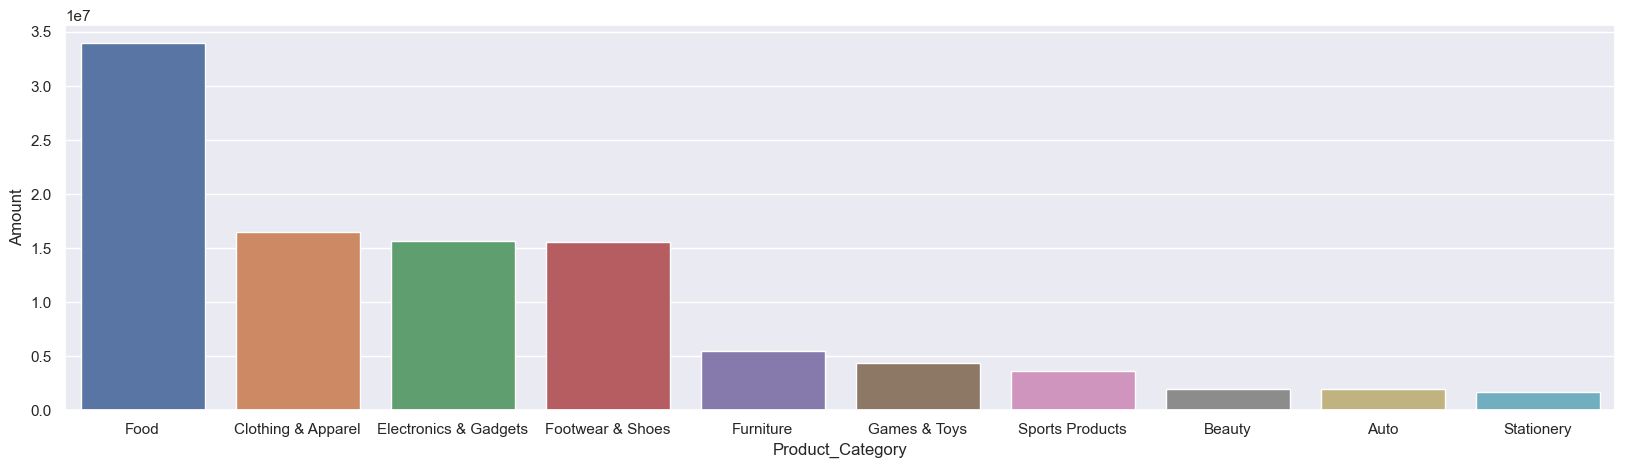

In [32]:
product_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
print(product_category)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = product_category)

The graph clearly shows that the Food, Clothing & Apparel, and Electronics & Gadgets sectors are leading contributors to revenue generation. Interestingly, although the Footwear and Shoes category has a lower volume of orders, its revenue is comparable to that of the Electronics and Gadgets sector. This indicates a significant revenue per order in the Footwear and Shoes industry.

#### Top 10 most sold products

     Product_ID  Orders
1679  P00265242     127
644   P00110942     116
1504  P00237542      91
1146  P00184942      82
679   P00114942      79
171   P00025442      79
708   P00117942      76
888   P00145042      76
298   P00044442      75
643   P00110842      74


<Axes: xlabel='Product_ID', ylabel='Orders'>

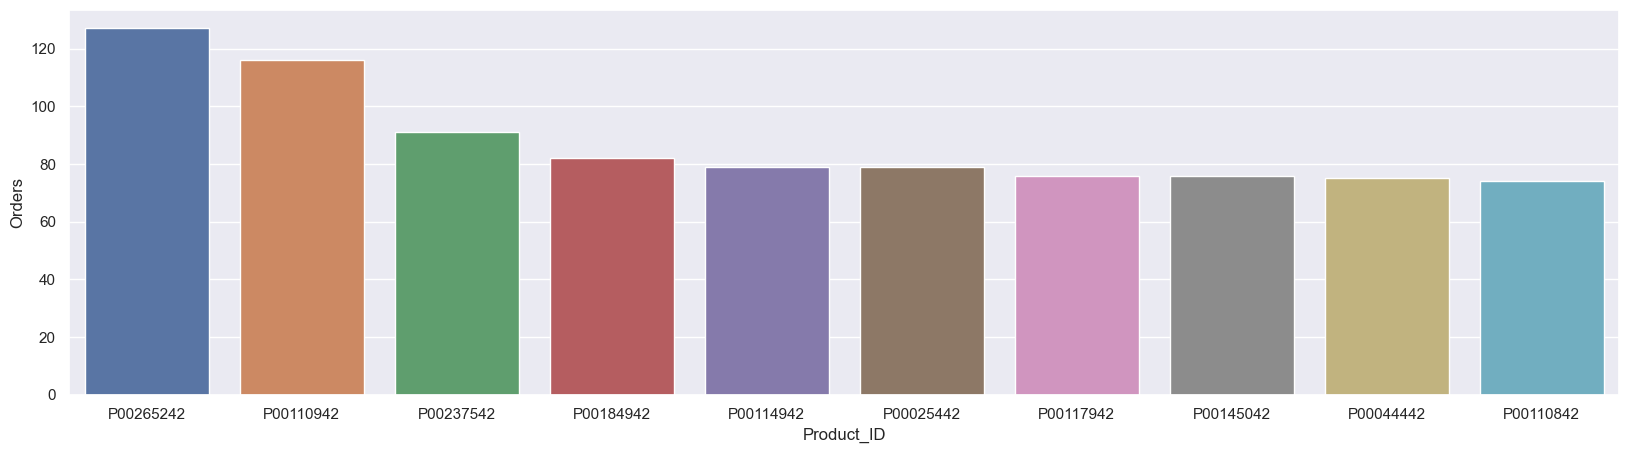

In [33]:
product_id = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)
print(product_id)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_ID', y = 'Orders', data = product_id)

**Conclusion**

The analysis reveals several key insights into the purchasing behavior and revenue generation across different categories, demographics, and regions. 

1. The median purchase values across all categories fall within the range of 5000-10000, with an interquartile range of 5000-15000, indicating a significant spread and presence of outliers in the data.

2. Female buyers outnumber male buyers and also exhibit higher purchasing power, contributing significantly to the overall revenue.

3. The age group of 26-35, particularly female buyers, shows higher spending during the festive season of Diwali, indicating their substantial contribution to sales volume and revenue during this period.

4. The states of Uttar Pradesh, Maharashtra, and Karnataka lead in terms of order volume and total revenue generated, highlighting these regions as key markets.

5. Married individuals, especially females, account for the highest number of orders and sales, suggesting a strong correlation between marital status and purchasing behavior.

6. The IT, Healthcare, Aviation, Food, Clothing & Apparel, and Electronics & Gadgets sectors are the primary contributors to revenue generation. Despite lower order volumes, the Footwear and Shoes category generates comparable revenue to the Electronics and Gadgets sector, indicating a high revenue per order in this industry.

These insights can guide strategic decisions to optimize marketing efforts, product offerings, and customer engagement initiatives to maximize revenue generation.